# Entregable 2: Comparación de distintos espacios de color en imágenes digitales

Este proyecto presenta un análisis completo de diferentes espacios de color y sus aplicaciones prácticas en visión por ordenador.

## Creación de imágenes de Prueba
Las imágenes utilizadas en los experimentos se gestionan automáticamente:
- **Primera ejecución**: Se crean y guardan en la carpeta `data/`
- **Ejecuciones posteriores**: Se cargan desde `data/`
- **Imágenes incluidas**: 
  - `gradiente_rgb.png` - Gradientes de colores primarios
  - `colores_saturados.png` - Colores puros para análisis HSV
  - `espectro_hsv.png` - Espectro completo HSV (Hue horizontal, Saturación vertical)
  - `codigo_barras.png` - Patrón binario para análisis en escala de grises
  - `tonos_piel.png` - Tonos de piel para detección YCrCb

## Espacios de Color a Analizar
1. **RGB** - Red, Green, Blue
2. **HSV** - Hue, Saturation, Value  
3. **CIELAB (Lab)** - Lightness, a*, b*
4. **YCrCb** - Luminance, Chrominance
5. **Escala de Grises** - Para aplicaciones binarias
6. **XYZ** - CIE 1931 color space

In [1]:
# Importación de librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
import os

# Configuración de matplotlib
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12

# Función auxiliar para mostrar múltiples imágenes
def mostrar_imagenes(imagenes, titulos, filas=2, columnas=3, figsize=(15, 10)):
    """
    Función para mostrar múltiples imágenes en una grilla
    """
    fig, axes = plt.subplots(filas, columnas, figsize=figsize)
    if filas == 1:
        axes = [axes]
    if columnas == 1:
        axes = [[ax] for ax in axes]
    
    for i, (img, titulo) in enumerate(zip(imagenes, titulos)):
        fila = i // columnas
        col = i % columnas
        
        if len(img.shape) == 3:
            # Imagen en color (RGB)
            axes[fila][col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            # Imagen en escala de grises
            axes[fila][col].imshow(img, cmap='gray')
        
        axes[fila][col].set_title(titulo)
        axes[fila][col].axis('off')
    
    # Ocultar axes no utilizados
    for i in range(len(imagenes), filas * columnas):
        fila = i // columnas
        col = i % columnas
        axes[fila][col].axis('off')
    
    plt.tight_layout()
    plt.show()

print("Librerías importadas correctamente")

Librerías importadas correctamente


✓ Cargada imagen existente: gradiente
✓ Cargada imagen existente: colores
✓ Cargada imagen existente: espectro_hsv
✓ Cargada imagen existente: barras
✓ Cargada imagen existente: piel


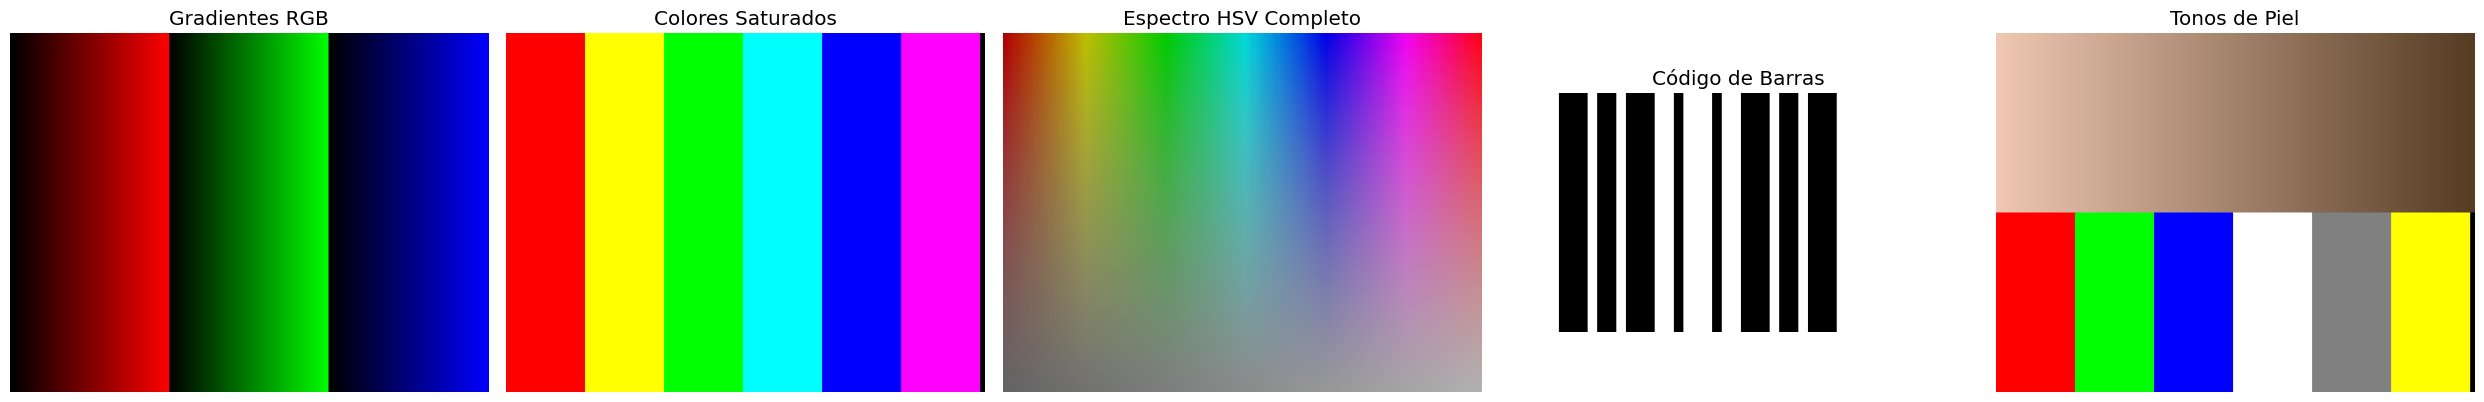

✓ Sistema de gestión de imágenes configurado
Las imágenes se guardan en 'data/' y se reutilizan en ejecuciones futuras


In [2]:
# Gestión de imágenes de prueba - Creación y carga desde data/
def crear_imagen_gradiente_rgb():
    """Crea una imagen con gradientes de colores RGB"""
    altura, ancho = 300, 400
    imagen = np.zeros((altura, ancho, 3), dtype=np.uint8)
    #Las imágenes en OpenCV usan el formato BGR en lugar de RGB

        # Gradiente horizontal de rojo
    for x in range(ancho//3):
        imagen[:300, x] = [0, 0, int(255 * x / (ancho//3))]

    # Gradiente horizontal de verde
    for x in range(ancho//3, 2*ancho//3):
        imagen[:300, x] = [0, int(255 * (x - ancho//3) / (ancho//3)), 0]

    # Gradiente horizontal de azul
    for x in range(2*ancho//3, ancho):
        imagen[:300, x] = [int(255 * (x - 2*ancho//3) / (ancho//3)), 0, 0]

    return imagen

def crear_imagen_colores_saturados():
    """Crea una imagen con colores saturados para análisis HSV"""
    altura, ancho = 300, 400
    imagen = np.zeros((altura, ancho, 3), dtype=np.uint8)
    
     # Colores en formato BGR (Blue, Green, Red)
    colores = [
        [0, 0, 255],      # Rojo en BGR
        [0, 255, 255],    # Amarillo en BGR  
        [0, 255, 0],      # Verde en BGR
        [255, 255, 0],    # Cian en BGR
        [255, 0, 0],      # Azul en BGR
        [255, 0, 255]     # Magenta en BGR
    ]
    
    ancho_banda = ancho // len(colores)
    for i, color in enumerate(colores):
        x_inicio = i * ancho_banda
        x_fin = min((i + 1) * ancho_banda, ancho)
        imagen[:, x_inicio:x_fin] = color
    
    return imagen

def crear_codigo_barras():
    """Crea una imagen de código de barras"""
    altura, ancho = 200, 400
    imagen = np.ones((altura, ancho), dtype=np.uint8) * 255
    
    # Patrón de barras
    patron = [3, 1, 2, 1, 3, 2, 1, 3, 1, 2, 3, 1, 2, 1, 3]
    x = 50
    color_actual = 0  # 0 para negro, 255 para blanco
    
    for ancho_barra in patron:
        imagen[:, x:x+ancho_barra*8] = color_actual
        color_actual = 255 - color_actual  # Alternar entre negro y blanco
        x += ancho_barra * 8
    
    return imagen

def crear_imagen_espectro_hsv():
    """Crea una imagen que muestra todo el espectro HSV de manera educativa
    - Eje X (horizontal): Hue de 0° a 179° (todo el espectro de colores)
    - Eje Y (vertical): Saturación de 255 (arriba) a 0 (abajo)
    - Profundidad (diagonal): Value varía para mostrar el espacio HSV completo
    """
    altura, ancho = 300, 400
    imagen = np.zeros((altura, ancho, 3), dtype=np.uint8)
    
    # Crear espectro HSV completo con variación en los tres canales
    for y in range(altura):
        for x in range(ancho):
            # Calcular valores HSV
            # Hue: varía horizontalmente de 0 a 179 (rango OpenCV)
            h = int((x / ancho) * 179)
            
            # Saturation: varía verticalmente de 255 (arriba) a 0 (abajo)
            s = int(255 * (1 - y / altura))
            
            # Value: varía diagonalmente para crear un espectro 3D proyectado en 2D
            # Esquina superior izquierda: V máximo (255)
            # Esquina inferior derecha: V mínimo (pero no negro total)
            # Esto permite ver cómo interactúan H, S y V
            factor_diagonal = (x / ancho + (1 - y / altura)) / 2
            v = int(100 + 155 * factor_diagonal)  # Rango: 100-255 para mantener visibilidad
            
            # Crear pixel HSV y convertir a BGR
            hsv_pixel = np.array([[[h, s, v]]], dtype=np.uint8)
            bgr_pixel = cv2.cvtColor(hsv_pixel, cv2.COLOR_HSV2BGR)
            imagen[y, x] = bgr_pixel[0, 0]
    
    return imagen

def crear_imagen_con_piel():
    """Crea una imagen con gradiente de tonos de piel para demostrar YCrCb"""
    altura, ancho = 300, 400
    imagen = np.zeros((altura, ancho, 3), dtype=np.uint8)
    
    # Definir tonos de piel extremos para el gradiente (valores BGR)
    piel_clara = np.array([180, 200, 240], dtype=np.float32)    # Piel muy clara (rosada)
    piel_oscura = np.array([35, 60, 85], dtype=np.float32)     # Piel muy oscura
    
    # Crear gradiente horizontal de tonos de piel (parte superior)
    for x in range(ancho):
        # Calcular factor de interpolación (0.0 a 1.0)
        factor = x / (ancho - 1)
        
        # Interpolar entre piel clara y oscura
        color_piel = piel_clara * (1 - factor) + piel_oscura * factor
        
        # Asignar color a la mitad superior de la imagen
        imagen[:altura//2, x] = color_piel.astype(np.uint8)
    
    # Añadir otros colores para comparación (parte inferior)
    otros_colores = [
        [0, 0, 255],        # Rojo
        [0, 255, 0],        # Verde  
        [255, 0, 0],        # Azul
        [255, 255, 255],    # Blanco
        [128, 128, 128],    # Gris
        [0, 255, 255],      # Amarillo
    ]
    
    seccion_ancho = ancho // len(otros_colores)
    
    # Añadir otros colores en la parte inferior
    for i, color in enumerate(otros_colores):
        x_inicio = i * seccion_ancho
        x_fin = min((i + 1) * seccion_ancho, ancho)
        imagen[altura//2:, x_inicio:x_fin] = color
    
    return imagen

def cargar_o_crear_imagenes():
    """Carga las imágenes desde data/ o las crea si no existen"""
    # Crear directorio data si no existe
    data_dir = 'data'
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
        print(f"Directorio '{data_dir}' creado")
    
    # Rutas de las imágenes
    rutas = {
        'gradiente': os.path.join(data_dir, 'gradiente_rgb.png'),
        'colores': os.path.join(data_dir, 'colores_saturados.png'),
        'espectro_hsv': os.path.join(data_dir, 'espectro_hsv.png'),
        'barras': os.path.join(data_dir, 'codigo_barras.png'),
        'piel': os.path.join(data_dir, 'tonos_piel.png')
    }
    
    imagenes = {}
    
    # Cargar o crear cada imagen
    for nombre, ruta in rutas.items():
        if os.path.exists(ruta):
            if nombre == 'barras':
                # Código de barras es escala de grises
                imagenes[nombre] = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
            else:
                # Imágenes en color
                imagenes[nombre] = cv2.imread(ruta)
            print(f"✓ Cargada imagen existente: {nombre}")
        else:
            # Crear imagen sintética
            if nombre == 'gradiente':
                imagenes[nombre] = crear_imagen_gradiente_rgb()
            elif nombre == 'colores':
                imagenes[nombre] = crear_imagen_colores_saturados()
            elif nombre == 'espectro_hsv':
                imagenes[nombre] = crear_imagen_espectro_hsv()
            elif nombre == 'barras':
                imagenes[nombre] = crear_codigo_barras()
            elif nombre == 'piel':
                imagenes[nombre] = crear_imagen_con_piel()
            
            # Guardar imagen
            cv2.imwrite(ruta, imagenes[nombre])
            print(f"✓ Creada y guardada nueva imagen: {nombre}")
    
    return imagenes['gradiente'], imagenes['colores'], imagenes['espectro_hsv'], imagenes['barras'], imagenes['piel']

# Cargar o crear las imágenes de prueba
img_gradiente, img_colores, img_espectro_hsv, img_barras, img_piel = cargar_o_crear_imagenes()

# Mostrar las imágenes cargadas/creadas
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

axes[0].imshow(cv2.cvtColor(img_gradiente, cv2.COLOR_BGR2RGB))
axes[0].set_title('Gradientes RGB')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(img_colores, cv2.COLOR_BGR2RGB))
axes[1].set_title('Colores Saturados')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(img_espectro_hsv, cv2.COLOR_BGR2RGB))
axes[2].set_title('Espectro HSV Completo')
axes[2].axis('off')

axes[3].imshow(img_barras, cmap='gray')
axes[3].set_title('Código de Barras')
axes[3].axis('off')

axes[4].imshow(cv2.cvtColor(img_piel, cv2.COLOR_BGR2RGB))
axes[4].set_title('Tonos de Piel')
axes[4].axis('off')

plt.tight_layout()
plt.show()

print("✓ Sistema de gestión de imágenes configurado")
print("Las imágenes se guardan en 'data/' y se reutilizan en ejecuciones futuras")

## 1. Espacio de Color RGB (Red, Green, Blue)

### Características
- Los colores se forman sumando intensidades de rojo, verde y azul
- Cada canal tiene valores de 0-255 (8 bits)

### Experimento 1: Separación y Visualización de Canales RGB

Utilizamos la imagen de **gradientes RGB** porque:
- Cada sección contiene principalmente un color primario (rojo, verde, azul)
- Los gradientes muestran cómo cambia la intensidad de cada canal de 0 a 255

Separaremos los canales R, G, B de la imagen y los visualizaremos tanto en escala de grises (para ver la contribución individual) como en color (para ver el efecto visual de cada canal).

In [ ]:
# Experimento 1: Separación y Visualización de Canales RGB
r,g,b = cv2.split(cv2.cvtColor(img_gradiente, cv2.COLOR_BGR2RGB))

# Visualizar análisis RGB - Separación de canales
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# Imagen original
axes[0,0].imshow(cv2.cvtColor(img_gradiente, cv2.COLOR_BGR2RGB))
axes[0,0].set_title('Imagen Original')
axes[0,0].axis('off')

# Canales individuales en escala de grises
axes[0,1].imshow(r, cmap='Greys')
axes[0,1].set_title('Canal Rojo')
axes[0,1].axis('off')

axes[0,2].imshow(g, cmap='Greys')
axes[0,2].set_title('Canal Verde')
axes[0,2].axis('off')

axes[0,3].imshow(b, cmap='Greys')
axes[0,3].set_title('Canal Azul')
axes[0,3].axis('off')


# Canales individuales de color
axes[1,0].imshow(r, cmap='Reds')
axes[1,0].set_title('Solo Canal Rojo')
axes[1,0].axis('off')

axes[1,1].imshow(g, cmap='Greens')
axes[1,1].set_title('Solo Canal Verde')
axes[1,1].axis('off')

axes[1,2].imshow(b, cmap='Blues')
axes[1,2].set_title('Solo Canal Azul')
axes[1,2].axis('off')

# Reorganización de colores a bgr
axes[1,3].imshow(img_gradiente)
axes[1,3].set_title('Recombinar a BGR')
axes[1,3].axis('off')

plt.suptitle('Experimento 1: Separación de Canales RGB', fontsize=16)
plt.tight_layout()
plt.show()


### Experimento 2: Análisis de Histogramas RGB

Continuamos usando la **imagen de gradientes RGB** porque:
- Permite comparar cómo se distribuyen los valores de intensidad en cada canal R, G, B
- Los histogramas revelan si los canales están correlacionados o son independientes


Visualizaremos los histogramas de cada canal RGB para entender la distribución estadística de los valores de color y identificar características importantes como picos, distribuciones uniformes, y posibles correlaciones entre canales.

In [ ]:
# Experimento 2: Análisis de Histogramas RGB
def analizar_histogramas_rgb(imagen):
    """Calcula y analiza los histogramas de cada canal RGB"""
    b, g, r = cv2.split(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    
    # Calcular histogramas
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    
    return hist_r, hist_g, hist_b, r, g, b

# Calcular histogramas
hist_r, hist_g, hist_b, r, g, b = analizar_histogramas_rgb(img_gradiente)

# Visualizar histogramas RGB
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(hist_r, color='red', alpha=0.7, linewidth=2)
axes[0].fill_between(range(256), hist_r.flatten(), alpha=0.3, color='red')
axes[0].set_title('Histograma Canal Rojo')
axes[0].set_xlabel('Intensidad')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True, alpha=0.3)

axes[1].plot(hist_g, color='green', alpha=0.7, linewidth=2)
axes[1].fill_between(range(256), hist_g.flatten(), alpha=0.3, color='green')
axes[1].set_title('Histograma Canal Verde')
axes[1].set_xlabel('Intensidad')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True, alpha=0.3)

axes[2].plot(hist_b, color='blue', alpha=0.7, linewidth=2)
axes[2].fill_between(range(256), hist_b.flatten(), alpha=0.3, color='blue')
axes[2].set_title('Histograma Canal Azul')
axes[2].set_xlabel('Intensidad')
axes[2].set_ylabel('Frecuencia')
axes[2].grid(True, alpha=0.3)

plt.suptitle('Experimento 2: Análisis de Histogramas RGB', fontsize=16)
plt.tight_layout()
plt.show()

# Análisis estadístico

print(f"Canal Rojo - Media: {np.mean(r):.1f}, Desv.Est: {np.std(r):.1f}")
print(f"Canal Verde - Media: {np.mean(g):.1f}, Desv.Est: {np.std(g):.1f}")
print(f"Canal Azul - Media: {np.mean(b):.1f}, Desv.Est: {np.std(b):.1f}")

# Calcular correlaciones entre canales
corr_rg = np.corrcoef(r.ravel(), g.ravel())[0,1]
corr_rb = np.corrcoef(r.ravel(), b.ravel())[0,1]
corr_gb = np.corrcoef(g.ravel(), b.ravel())[0,1]

print(f"\nCorrelaciones entre canales:")
print(f"Rojo-Verde: {corr_rg:.3f}")
print(f"Rojo-Azul: {corr_rb:.3f}")
print(f"Verde-Azul: {corr_gb:.3f}")


## 2. Espacio de Color HSV (Hue, Saturation, Value)

### Características
- **H (Hue/Matiz)**: Tipo de color, rango 0-179° en OpenCV
- **S (Saturation/Saturación)**: Pureza del color, rango 0-255
- **V (Value/Valor)**: Brillo/luminosidad, rango 0-255
- **Separación**: Separa información de color (H,S) de luminosidad (V)

HSV separa la información cromática (H, S) de la luminosidad (V), lo que lo hace superior a RGB para:
- Segmentación robusta por color bajo diferentes condiciones de iluminación
- Detección de objetos basada en color
- Aplicaciones donde el color es más importante que el brillo


Utilizamos dos imágenes para los experimentos:

1. **Colores saturados**: Ideal para HSV porque:
   - Permite ver claramente el canal de saturación en su máximo valor
   - Cada banda representa un matiz específico, mostrando la distribución circular del Hue
   - Al tener brillo uniforme, se puede aislar el efecto de H y S
   - Cada color se puede segmentar fácilmente definiendo rangos de Hue

2. **Espectro HSV completo**: Muestra todo el espacio HSV porque:
   - **Eje horizontal**: Hue de 0° a 179° (todo el espectro de colores)
   - **Eje vertical**: Saturación de 255 (arriba) a 0 (abajo)
   - **Variación diagonal**: Value de 255 (esquina superior izq.) a 100 (esquina inferior der.)


### Experimento 1: Separación de canales.

In [ ]:
# Análisis del espacio HSV
def analizar_hsv(imagen):
    """Convierte imagen a HSV y analiza sus canales"""
    # Convertir de BGR a HSV
    hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
    
    # Separar canales
    h, s, v = cv2.split(hsv)
    
    return hsv, h, s, v

def visualizar_hue_correctamente(canal_h):
    altura, ancho = canal_h.shape
    hsv_visual = np.zeros((altura, ancho, 3), dtype=np.uint8)
    hsv_visual[:,:,0] = canal_h  # Hue original (0-179)
    hsv_visual[:,:,1] = 255      # Saturación máxima
    hsv_visual[:,:,2] = 255      # Valor máximo
    
    # Convertir de HSV a RGB para visualización
    rgb_visual = cv2.cvtColor(hsv_visual, cv2.COLOR_HSV2RGB)
    
    return rgb_visual

# Análisis con imagen de colores saturados y espectro HSV
hsv_saturados, h_sat, s_sat, v_sat = analizar_hsv(img_colores)
hsv_espectro, h_esp, s_esp, v_esp = analizar_hsv(img_espectro_hsv)

# Visualizar análisis HSV
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Imagen de colores saturados
axes[0,0].imshow(cv2.cvtColor(img_colores, cv2.COLOR_BGR2RGB))
axes[0,0].set_title('Original - Colores Saturados')
axes[0,0].axis('off')

# Canales HSV - Colores saturados
axes[0,1].imshow(visualizar_hue_correctamente(h_sat))
axes[0,1].set_title('Hue (Matiz)')
axes[0,1].axis('off')

axes[0,2].imshow(s_sat, cmap='gray')
axes[0,2].set_title('Saturation')
axes[0,2].axis('off')

axes[0,3].imshow(v_sat, cmap='gray')
axes[0,3].set_title('Value ')
axes[0,3].axis('off')

# Espectro HSV completo
axes[1,0].imshow(cv2.cvtColor(img_espectro_hsv, cv2.COLOR_BGR2RGB))
axes[1,0].set_title('Original - Espectro HSV')
axes[1,0].axis('off')

axes[1,1].imshow(visualizar_hue_correctamente(h_esp))
axes[1,1].set_title('Hue (Todo el Espectro)')
axes[1,1].axis('off')

axes[1,2].imshow(s_esp, cmap='gray')
axes[1,2].set_title('Saturation ')
axes[1,2].axis('off')

axes[1,3].imshow(v_esp, cmap='gray')
axes[1,3].set_title('Value')
axes[1,3].axis('off')

plt.tight_layout()
plt.show()

### Experimento 2: Segmentación de colores

In [ ]:

# Demostración de segmentación por color en HSV
def segmentar_color_hsv(imagen, color_name, h_range, s_min=50, v_min=50):
    """Segmenta un color específico usando rangos HSV"""
    hsv = cv2.cvtColor(imagen, cv2.COLOR_RGB2HSV)
    
    # Crear máscara
    if len(h_range) == 2 and h_range[0] < h_range[1]:
        # Rango normal
        lower = np.array([h_range[0], s_min, v_min])
        upper = np.array([h_range[1], 255, 255])
        mask = cv2.inRange(hsv, lower, upper)
    else:
        # Rango que cruza 0° (ej: rojo) - h_range[0] > h_range[1]
        # Crear dos máscaras: una para [0, h_range[1]] y otra para [h_range[0], 179]
        lower1 = np.array([0, s_min, v_min])
        upper1 = np.array([h_range[1], 255, 255])
        lower2 = np.array([h_range[0], s_min, v_min])
        upper2 = np.array([179, 255, 255])

        mask1 = cv2.inRange(hsv, lower1, upper1)
        mask2 = cv2.inRange(hsv, lower2, upper2)
        mask = cv2.bitwise_or(mask1, mask2)
    
    # Aplicar máscara
    resultado = cv2.bitwise_and(imagen, imagen, mask=mask)
    
    return mask, resultado

# Segmentar diferentes colores
mask_rojo, seg_rojo = segmentar_color_hsv(img_colores, "Rojo", [170, 10])
mask_verde, seg_verde = segmentar_color_hsv(img_colores, "Verde", [40, 80])
mask_azul, seg_azul = segmentar_color_hsv(img_colores, "Azul", [100, 130])

# Mostrar segmentación
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

axes[0,0].imshow(img_colores)
axes[0,0].set_title('Imagen Original')
axes[0,0].axis('off')

axes[0,1].imshow(mask_rojo, cmap='gray')
axes[0,1].set_title('Máscara Rojo')
axes[0,1].axis('off')

axes[0,2].imshow(mask_verde, cmap='gray')
axes[0,2].set_title('Máscara Verde')
axes[0,2].axis('off')

axes[0,3].imshow(mask_azul, cmap='gray')
axes[0,3].set_title('Máscara Azul')
axes[0,3].axis('off')

axes[1,0].axis('off')

axes[1,1].imshow(seg_rojo)
axes[1,1].set_title('Segmentación Rojo')
axes[1,1].axis('off')

axes[1,2].imshow(seg_verde)
axes[1,2].set_title('Segmentación Verde')
axes[1,2].axis('off')

axes[1,3].imshow(seg_azul)
axes[1,3].set_title('Segmentación Azul')
axes[1,3].axis('off')

plt.tight_layout()
plt.show()

## 3. Espacio de Color CIELAB (Lab)

### Características
- **L**: Lightness (luminosidad), rango 0-100
- **a**: Verde-Rojo, rango aproximado -128 a +127
- **b**: Azul-Amarillo, rango aproximado -128 a +127
- **Uniforme perceptualmente**: Distancias euclidianas corresponden a diferencias percibidas
- **Independiente del dispositivo**: Basado en percepción humana

CIELAB es el único espacio uniforme perceptualmente en nuestro análisis, lo que significa:
- Las distancias euclidianas corresponden a diferencias de color percibidas por el ojo humano
- Permite medición objetiva de diferencias de color (ΔE)
- Es independiente del dispositivo y basado en estándares internacionales

**Experimentos a realizar:**
1. **Separación de canales**: Analizar L, a*, b* en colores saturados y gradientes
2. **Cálculo de Delta E**: Medir diferencias perceptuales entre colores
3. **Análisis de modificación**: Simular cambios de iluminación y medir impacto

### Experimento 1: Separación de Canales LAB

**Colores Saturados:**
- **Canales a* y b* bien definidos**: Los colores rojo/verde muestran extremos del eje a*, azul/amarillo del eje b*
- Visualizar cómo CIELAB organiza el espacio cromático
- Colores puros facilitan entender la transformación desde RGB

**Expectro completo:**
- **Transiciones suaves**: Muestran cómo LAB maneja cambios graduales de color
- **Información de luminancia**: El canal L* separa claramente el brillo del color


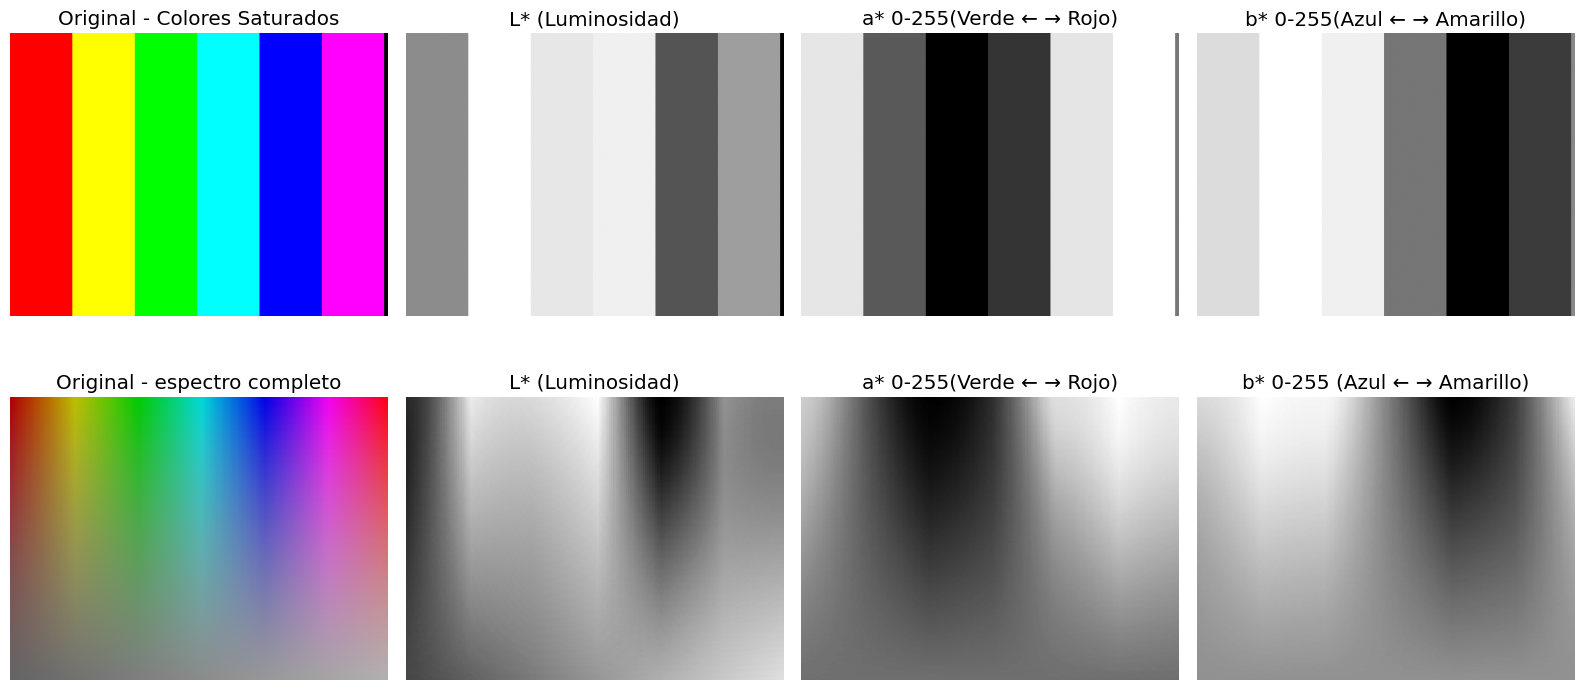

In [3]:
# Análisis del espacio CIELAB
def analizar_lab(imagen):
    """Convierte imagen a LAB y analiza sus canales"""
    # Convertir de BGR a LAB
    lab = cv2.cvtColor(imagen, cv2.COLOR_BGR2LAB)
    
    # Separar canales
    l, a, b = cv2.split(lab)
    
    return lab, l, a, b

def calcular_delta_e(lab1, lab2):
    """Calcula la diferencia de color Delta E entre dos colores LAB"""
    # Convertir a float para evitar overflow
    lab1 = lab1.astype(np.float64)
    lab2 = lab2.astype(np.float64)
    
    # Calcular diferencias
    delta_l = lab1[:,:,0] - lab2[:,:,0]
    delta_a = lab1[:,:,1] - lab2[:,:,1]
    delta_b = lab1[:,:,2] - lab2[:,:,2]
    
    # Delta E (CIE76)
    delta_e = np.sqrt(delta_l**2 + delta_a**2 + delta_b**2)
    
    return delta_e

# Análisis LAB
lab_colores, l_col, a_col, b_col = analizar_lab(img_colores)
lab_gradiente, l_grad, a_grad, b_grad = analizar_lab(img_espectro_hsv)


# Visualizar análisis LAB
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Imagen de colores saturados
axes[0,0].imshow(cv2.cvtColor(img_colores, cv2.COLOR_BGR2RGB))
axes[0,0].set_title('Original - Colores Saturados')
axes[0,0].axis('off')

axes[0,1].imshow(l_col, cmap='gray')
axes[0,1].set_title('L* (Luminosidad)')
axes[0,1].axis('off')

axes[0,2].imshow(a_col, cmap='gray')  # Rojo-Verde
axes[0,2].set_title('a* 0-255(Verde ← → Rojo)')
axes[0,2].axis('off')

axes[0,3].imshow(b_col, cmap='gray')  # Amarillo-Azul
axes[0,3].set_title('b* 0-255(Azul ← → Amarillo)')
axes[0,3].axis('off')

# Imagen gradiente
axes[1,0].imshow(cv2.cvtColor(img_espectro_hsv, cv2.COLOR_BGR2RGB))
axes[1,0].set_title('Original - espectro completo')
axes[1,0].axis('off')

axes[1,1].imshow(l_grad, cmap='gray')
axes[1,1].set_title('L* (Luminosidad)')
axes[1,1].axis('off')

axes[1,2].imshow(a_grad, cmap='gray')
axes[1,2].set_title('a* 0-255(Verde ← → Rojo)')
axes[1,2].axis('off')

axes[1,3].imshow(b_grad, cmap='gray')
axes[1,3].set_title('b* 0-255 (Azul ← → Amarillo)')
axes[1,3].axis('off')

plt.tight_layout()
plt.show()


### Experimento 2: Cálculo de Delta E:

Medir diferencias perceptuales entre colores

=== Análisis de Diferencias Perceptuales (Delta E) ===
Delta E - Media: 28.05
Delta E - Máximo: 46.00
Delta E - Mínimo: 0.00
Delta E - Desv. Estándar: 12.96

Interpretación Delta E:
• ΔE < 1: Diferencia imperceptible
• ΔE 1-3: Apenas perceptible por experto
• ΔE 3-6: Perceptible por observador promedio
• ΔE > 6: Diferencia claramente visible

Contribución por canal:
• Canal L* (Luminancia): Media Δ = 28.05
• Canal a* (Verde-Rojo): Media Δ = 0.00
• Canal b* (Azul-Amarillo): Media Δ = 0.00


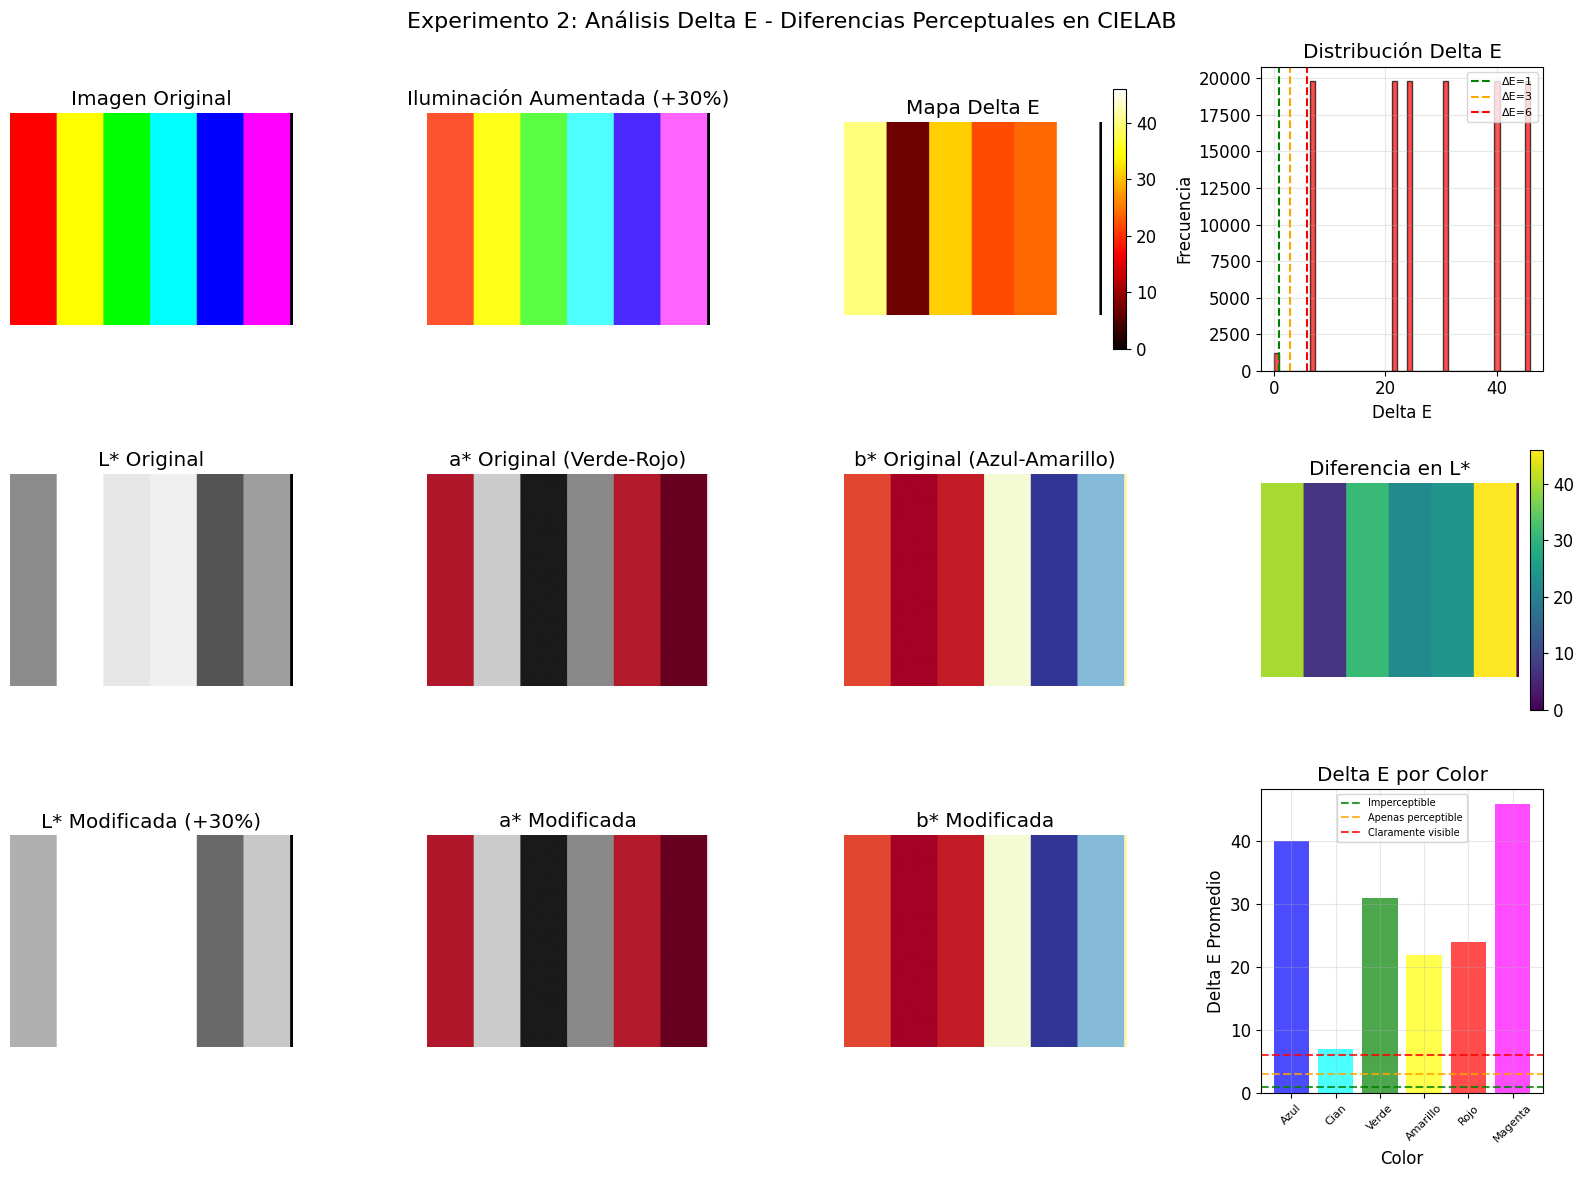


=== Sensibilidad Delta E por Color ===
• Azul    : ΔE = 40.00 (Claramente visible)
• Cian    : ΔE = 7.00 (Claramente visible)
• Verde   : ΔE = 31.00 (Claramente visible)
• Amarillo: ΔE = 22.00 (Claramente visible)
• Rojo    : ΔE = 24.00 (Claramente visible)
• Magenta : ΔE = 46.00 (Claramente visible)


In [4]:
# Experimento 2: Cálculo de Delta E - Diferencias Perceptuales

def simular_cambio_iluminacion(imagen, factor_luminancia=1.2):
    """Simula cambio de iluminación modificando el canal L* en LAB"""
    lab = cv2.cvtColor(imagen, cv2.COLOR_BGR2LAB)
    lab_modificada = lab.copy()
    
    # Modificar canal L* (luminancia)
    lab_modificada[:,:,0] = np.clip(lab_modificada[:,:,0] * factor_luminancia, 0, 255)
    
    # Convertir de vuelta a BGR
    img_modificada = cv2.cvtColor(lab_modificada, cv2.COLOR_LAB2BGR)
    
    return img_modificada, lab, lab_modificada

def calcular_delta_e_avanzado(lab1, lab2):
    """Calcula Delta E entre dos imágenes LAB completas"""
    # Asegurar que son float64 para evitar overflow
    lab1 = lab1.astype(np.float64)
    lab2 = lab2.astype(np.float64)
    
    # Calcular diferencias en cada canal
    delta_l = lab1[:,:,0] - lab2[:,:,0]
    delta_a = lab1[:,:,1] - lab2[:,:,1] 
    delta_b = lab1[:,:,2] - lab2[:,:,2]
    
    # Calcular Delta E usando la fórmula CIE76
    delta_e = np.sqrt(delta_l**2 + delta_a**2 + delta_b**2)
    
    return delta_e, delta_l, delta_a, delta_b

# Simular cambio de iluminación en colores saturados
img_modificada, lab_original, lab_modificada = simular_cambio_iluminacion(img_colores, factor_luminancia=1.3)

# Calcular Delta E
delta_e, delta_l, delta_a, delta_b = calcular_delta_e_avanzado(lab_original, lab_modificada)

# Análisis estadístico del Delta E
print("=== Análisis de Diferencias Perceptuales (Delta E) ===")
print(f"Delta E - Media: {np.mean(delta_e):.2f}")
print(f"Delta E - Máximo: {np.max(delta_e):.2f}")
print(f"Delta E - Mínimo: {np.min(delta_e):.2f}")
print(f"Delta E - Desv. Estándar: {np.std(delta_e):.2f}")

print(f"\nInterpretación Delta E:")
print(f"• ΔE < 1: Diferencia imperceptible")
print(f"• ΔE 1-3: Apenas perceptible por experto")
print(f"• ΔE 3-6: Perceptible por observador promedio")
print(f"• ΔE > 6: Diferencia claramente visible")

# Análisis por componentes
print(f"\nContribución por canal:")
print(f"• Canal L* (Luminancia): Media Δ = {np.mean(np.abs(delta_l)):.2f}")
print(f"• Canal a* (Verde-Rojo): Media Δ = {np.mean(np.abs(delta_a)):.2f}")
print(f"• Canal b* (Azul-Amarillo): Media Δ = {np.mean(np.abs(delta_b)):.2f}")

# Crear visualización completa
fig, axes = plt.subplots(3, 4, figsize=(16, 12))

# Fila 1: Imágenes originales y modificadas
axes[0,0].imshow(cv2.cvtColor(img_colores, cv2.COLOR_BGR2RGB))
axes[0,0].set_title('Imagen Original')
axes[0,0].axis('off')

axes[0,1].imshow(cv2.cvtColor(img_modificada, cv2.COLOR_BGR2RGB))
axes[0,1].set_title('Iluminación Aumentada (+30%)')
axes[0,1].axis('off')

# Mapa de calor Delta E
im1 = axes[0,2].imshow(delta_e, cmap='hot')
axes[0,2].set_title('Mapa Delta E')
axes[0,2].axis('off')
plt.colorbar(im1, ax=axes[0,2], fraction=0.046, pad=0.04)

# Histograma de Delta E
axes[0,3].hist(delta_e.ravel(), bins=50, alpha=0.7, color='red', edgecolor='black')
axes[0,3].set_title('Distribución Delta E')
axes[0,3].set_xlabel('Delta E')
axes[0,3].set_ylabel('Frecuencia')
axes[0,3].axvline(1, color='green', linestyle='--', label='ΔE=1')
axes[0,3].axvline(3, color='orange', linestyle='--', label='ΔE=3')
axes[0,3].axvline(6, color='red', linestyle='--', label='ΔE=6')
axes[0,3].legend(fontsize=8)
axes[0,3].grid(True, alpha=0.3)

# Fila 2: Componentes LAB originales
axes[1,0].imshow(lab_original[:,:,0], cmap='gray')
axes[1,0].set_title('L* Original')
axes[1,0].axis('off')

axes[1,1].imshow(lab_original[:,:,1], cmap='RdGy_r')
axes[1,1].set_title('a* Original (Verde-Rojo)')
axes[1,1].axis('off')

axes[1,2].imshow(lab_original[:,:,2], cmap='RdYlBu_r')
axes[1,2].set_title('b* Original (Azul-Amarillo)')
axes[1,2].axis('off')

# Diferencia de luminancia
diferencia_lum = np.abs(delta_l)
im = axes[1,3].imshow(diferencia_lum, cmap='viridis')
axes[1,3].set_title('Diferencia en L*')
axes[1,3].axis('off')
plt.colorbar(im, ax=axes[1,3], fraction=0.046, pad=0.04)

# Fila 3: Componentes LAB modificados
axes[2,0].imshow(lab_modificada[:,:,0], cmap='gray')
axes[2,0].set_title('L* Modificada (+30%)')
axes[2,0].axis('off')

axes[2,1].imshow(lab_modificada[:,:,1], cmap='RdGy_r')
axes[2,1].set_title('a* Modificada')
axes[2,1].axis('off')

axes[2,2].imshow(lab_modificada[:,:,2], cmap='RdYlBu_r')
axes[2,2].set_title('b* Modificada')
axes[2,2].axis('off')

# Análisis de regiones específicas
# Seleccionar región de cada color para análisis detallado
ancho_banda = img_colores.shape[1] // 6
regiones_colores = ['Azul', 'Cian', 'Verde', 'Amarillo', 'Rojo', 'Magenta']
delta_e_por_region = []

for i in range(6):
    x_inicio = i * ancho_banda
    x_fin = min((i + 1) * ancho_banda, img_colores.shape[1])
    region_delta_e = delta_e[:, x_inicio:x_fin]
    delta_e_por_region.append(np.mean(region_delta_e))

axes[2,3].bar(range(len(regiones_colores)), delta_e_por_region, 
              color=['blue', 'cyan', 'green', 'yellow', 'red', 'magenta'], alpha=0.7)
axes[2,3].set_title('Delta E por Color')
axes[2,3].set_xlabel('Color')
axes[2,3].set_ylabel('Delta E Promedio')
axes[2,3].set_xticks(range(len(regiones_colores)))
axes[2,3].set_xticklabels(regiones_colores, rotation=45, fontsize=8)
axes[2,3].grid(True, alpha=0.3)

# Añadir líneas de referencia
axes[2,3].axhline(1, color='green', linestyle='--', alpha=0.8, label='Imperceptible')
axes[2,3].axhline(3, color='orange', linestyle='--', alpha=0.8, label='Apenas perceptible')
axes[2,3].axhline(6, color='red', linestyle='--', alpha=0.8, label='Claramente visible')
axes[2,3].legend(fontsize=7)

plt.suptitle('Experimento 2: Análisis Delta E - Diferencias Perceptuales en CIELAB', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

# Análisis de sensibilidad por color
print(f"\n=== Sensibilidad Delta E por Color ===")
for i, (color, delta) in enumerate(zip(regiones_colores, delta_e_por_region)):
    if delta < 1:
        interpretacion = "Imperceptible"
    elif delta < 3:
        interpretacion = "Apenas perceptible"
    elif delta < 6:
        interpretacion = "Perceptible"
    else:
        interpretacion = "Claramente visible"
    
    print(f"• {color:8}: ΔE = {delta:.2f} ({interpretacion})")

## 4. Espacio de Color YCrCb

### Características
- **Y**: Luminancia (información de brillo), rango 0-255
- **Cr**: Chrominance Red-difference (Rojo - Y), rango 0-255
- **Cb**: Chrominance Blue-difference (Azul - Y), rango 0-255
- **Separación**: Divide luminancia de información cromática
- **Compresión**: Base para JPEG y muchos códecs de video

YCrCb es fundamental en visión por ordenador por dos razones principales:
- **Separación luminancia-cromaticidad**: Permite procesar brillo independientemente del color
- **Detección de piel**: Los canales Cr-Cb forman clusters brillantemente definidos para tonos de piel humana

### Experimento 1: Separación de Canales YCrCb

**Para este experimento utilizaremos la imagen de tonos de piel:**
- **Separación clara de componentes**: Los colores puros que contiene la imagen permiten ver cómo YCrCb descompone color vs luminancia
- **Validación de la conversión**: Verificar que Y captura el brillo y Cr/Cb la información cromática
- **Comparativa directa con los tonos de piel**

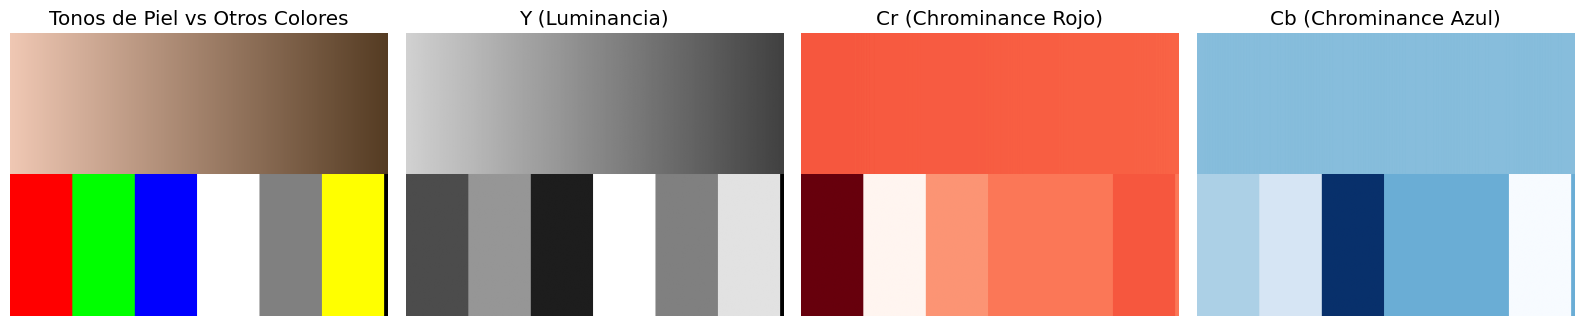

In [5]:
# Análisis del espacio YCrCb
def analizar_ycrcb(imagen):
    """Convierte imagen a YCrCb y analiza sus canales"""
    # Convertir de RGB a YCrCb
    ycrcb = cv2.cvtColor(imagen, cv2.COLOR_BGR2YCrCb)
    
    # Separar canales
    y, cr, cb = cv2.split(ycrcb)
    
    return ycrcb, y, cr, cb

# Análisis YCrCb usando las imágenes previamente cargadas

ycrcb_piel, y_piel, cr_piel, cb_piel = analizar_ycrcb(img_piel)

# Visualizar análisis YCrCb
fig, axes = plt.subplots(1, 4, figsize=(16, 8))

# Imagen con tonos de piel
axes[0].imshow(cv2.cvtColor(img_piel, cv2.COLOR_BGR2RGB))
axes[0].set_title('Tonos de Piel vs Otros Colores')
axes[0].axis('off')

axes[1].imshow(y_piel, cmap='gray')
axes[1].set_title('Y (Luminancia)')
axes[1].axis('off')

axes[2].imshow(cr_piel, cmap='Reds')
axes[2].set_title('Cr (Chrominance Rojo)')
axes[2].axis('off')

axes[3].imshow(cb_piel, cmap='Blues')
axes[3].set_title('Cb (Chrominance Azul)')
axes[3].axis('off')

plt.tight_layout()
plt.show()


### Experimento 2: Detección de Tonos de Piel

YCrCb se utiliza sobretodo por su gran rendimiento a la hora de detectar los tonos de colores correspondientes a la piel humana. En este experimento trataremos de detectar la sección que se corresponde con los tonos de piel de la imagen y veremos cual es la destribución típica de la crominancia para los tonos azules y rojos en la región de los colores de la piel.

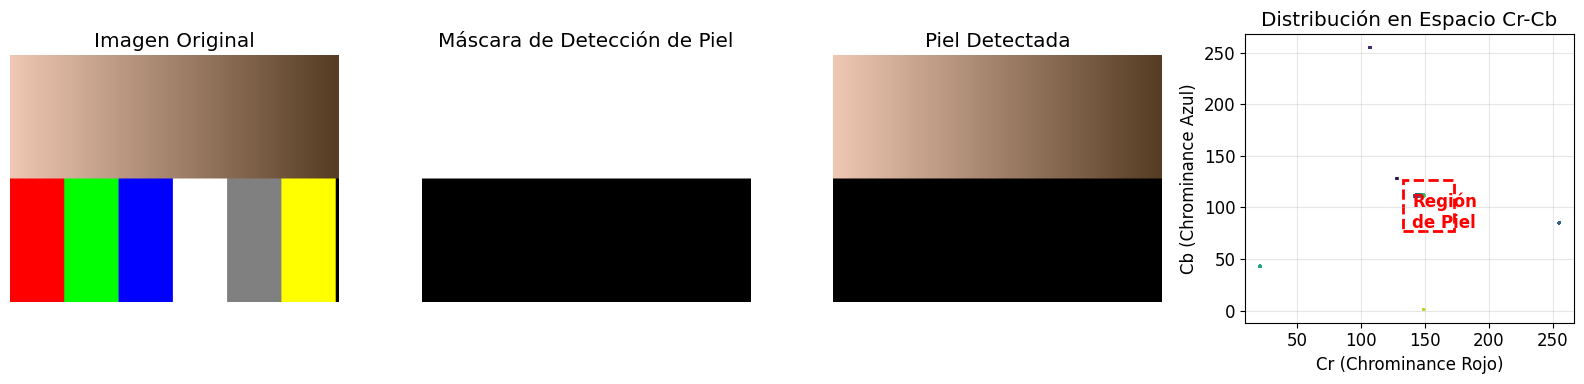

In [6]:

# Demostración de detección de piel usando YCrCb
def detectar_piel_ycrcb(imagen):
    """Detecta tonos de piel usando rangos típicos en YCrCb"""
    ycrcb = cv2.cvtColor(imagen, cv2.COLOR_BGR2YCrCb)
    
    # Rangos típicos para detección de piel en YCrCb
    lower_skin = np.array([0, 133, 77])    # Límites inferiores
    upper_skin = np.array([255, 173, 127]) # Límites superiores
    
    # Crear máscara
    mask = cv2.inRange(ycrcb, lower_skin, upper_skin)
    
    # Aplicar máscara
    resultado = cv2.bitwise_and(imagen, imagen, mask=mask)
    
    return mask, resultado

# Detectar piel
mask_piel, det_piel = detectar_piel_ycrcb(img_piel)

# Análisis en espacio Cr-Cb (útil para detección de piel)
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(cv2.cvtColor(img_piel, cv2.COLOR_BGR2RGB))
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(mask_piel, cmap='gray')
axes[1].set_title('Máscara de Detección de Piel')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(det_piel, cv2.COLOR_BGR2RGB))
axes[2].set_title('Piel Detectada')
axes[2].axis('off')

# Scatter plot en espacio Cr-Cb
axes[3].scatter(cr_piel.ravel(), cb_piel.ravel(), c=y_piel.ravel(), 
               cmap='viridis', alpha=0.6, s=1)
axes[3].set_xlabel('Cr (Chrominance Rojo)')
axes[3].set_ylabel('Cb (Chrominance Azul)')
axes[3].set_title('Distribución en Espacio Cr-Cb')
axes[3].grid(True, alpha=0.3)

# Dibujar región típica de piel
rect = Rectangle((133, 77), 173-133, 127-77, linewidth=2, 
                edgecolor='red', facecolor='none', linestyle='--')
axes[3].add_patch(rect)
axes[3].text(140, 80, 'Región\nde Piel', color='red', fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Escala de Grises y Aplicaciones Binarias

### Características
- **Un solo canal**: Valores de intensidad 0-255
- **Reducción de dimensionalidad**: De 3 canales (RGB) a 1
- **Conservación de información estructural**: Mantiene formas y texturas
- **Menor complejidad computacional**: Procesamiento más rápido

### Métodos de Conversión
1. **Promedio**: (R + G + B) / 3
2. **Luminancia (ITU-R BT.709)**: 0.299R + 0.587G + 0.114B
3. **Desaturación**: (max(R,G,B) + min(R,G,B)) / 2
4. **Canal único**: Usar solo R, G, o B

La escala de grises es crucial en visión por ordenador porque:
- **Eficiencia computacional**: Reduce la dimensionalidad de 3 canales a 1
- **Algoritmos clásicos**: Muchos algoritmos de detección están optimizados para un canal
- **Información estructural**: Preserva formas, texturas y patrones sin la complejidad del color
- **Aplicaciones específicas**: OCR, códigos de barras, análisis médico






3. **Gradientes para detección de bordes**:
   - **Transiciones suaves**: Ideales para algoritmos de detección de bordes (Canny, Sobel, Laplaciano)
   - **Información estructural**: Demuestra cómo la escala de grises preserva formas y contornos
   - **Comparación de operadores**: Permite evaluar diferentes técnicas de detección

### Experimento 1: Diferentes conversiones a escala de grises
En este experimento exploraremos varios de los diferentes métodos de conversión a escala de grises. Para poder observar con mayor claridad los resultados utilizaremos la imagen de colores saturados

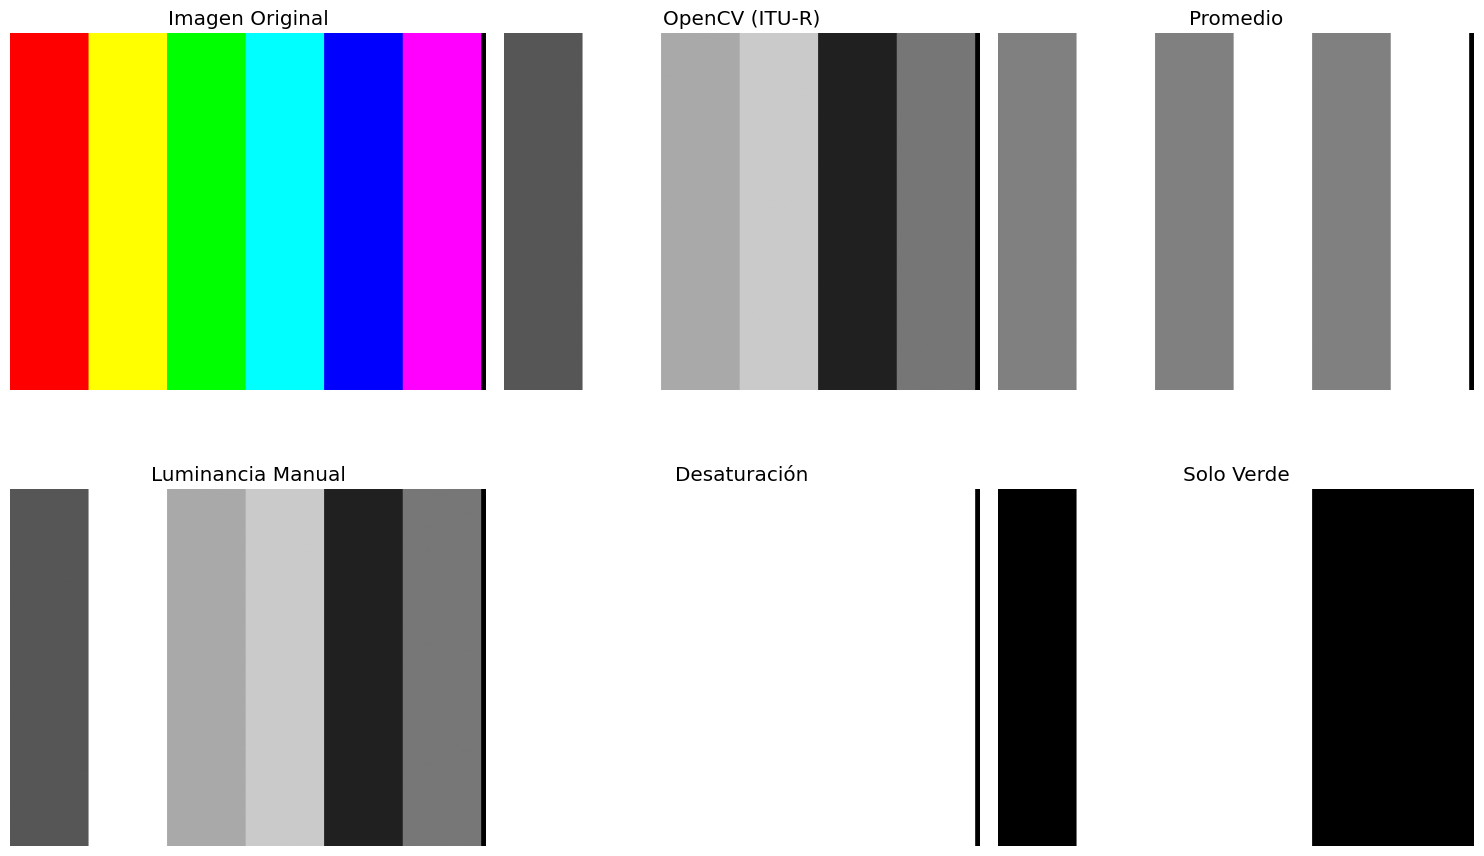

In [7]:
# Análisis de Escala de Grises y Aplicaciones Binarias

def convertir_gris_metodos(imagen):
    """Compara diferentes métodos de conversión a escala de grises"""
    # Método 1: Conversión estándar de OpenCV (usa ITU-R BT.709)
    gris_opencv = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    # Método 2: Promedio simple
    gris_promedio = np.mean(imagen, axis=2).astype(np.uint8)
    
    # Método 3: Luminancia manual (ITU-R BT.709)
    b, g, r = cv2.split(imagen)
    gris_luminancia = (0.114 * b + 0.587 * g + 0.299 * r).astype(np.uint8)
    
    # Método 4: Desaturación
    gris_desaturacion = ((np.max(imagen, axis=2) + np.min(imagen, axis=2)) / 2).astype(np.uint8)
    
    # Método 5: Solo canal verde (más sensible a luminancia)
    gris_verde = imagen[:,:,1]
    
    return gris_opencv, gris_promedio, gris_luminancia, gris_desaturacion, gris_verde

# Analizar diferentes métodos de conversión
metodos = convertir_gris_metodos(img_colores)
nombres_metodos = ['OpenCV (ITU-R)', 'Promedio', 'Luminancia Manual', 'Desaturación', 'Solo Verde']

# Visualizar comparación de métodos
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Imagen original
axes[0,0].imshow(cv2.cvtColor(img_colores, cv2.COLOR_BGR2RGB))
axes[0,0].set_title('Imagen Original')
axes[0,0].axis('off')

# Métodos de conversión
for i, (metodo, nombre) in enumerate(zip(metodos, nombres_metodos)):
    fila = (i + 1) // 3
    col = (i + 1) % 3
    axes[fila, col].imshow(metodo, cmap='gray')
    axes[fila, col].set_title(nombre)
    axes[fila, col].axis('off')

plt.tight_layout()
plt.show()

### Experimento 2: Análisis de código de barras

En este experimento analizaremos la poténcia que hay detrás de las aplicacianes más comunes de escala de grises: Las aplicaciones binárias para reconocimiento de código de barras. Para ello utilizaremos la imagen del código de barras.

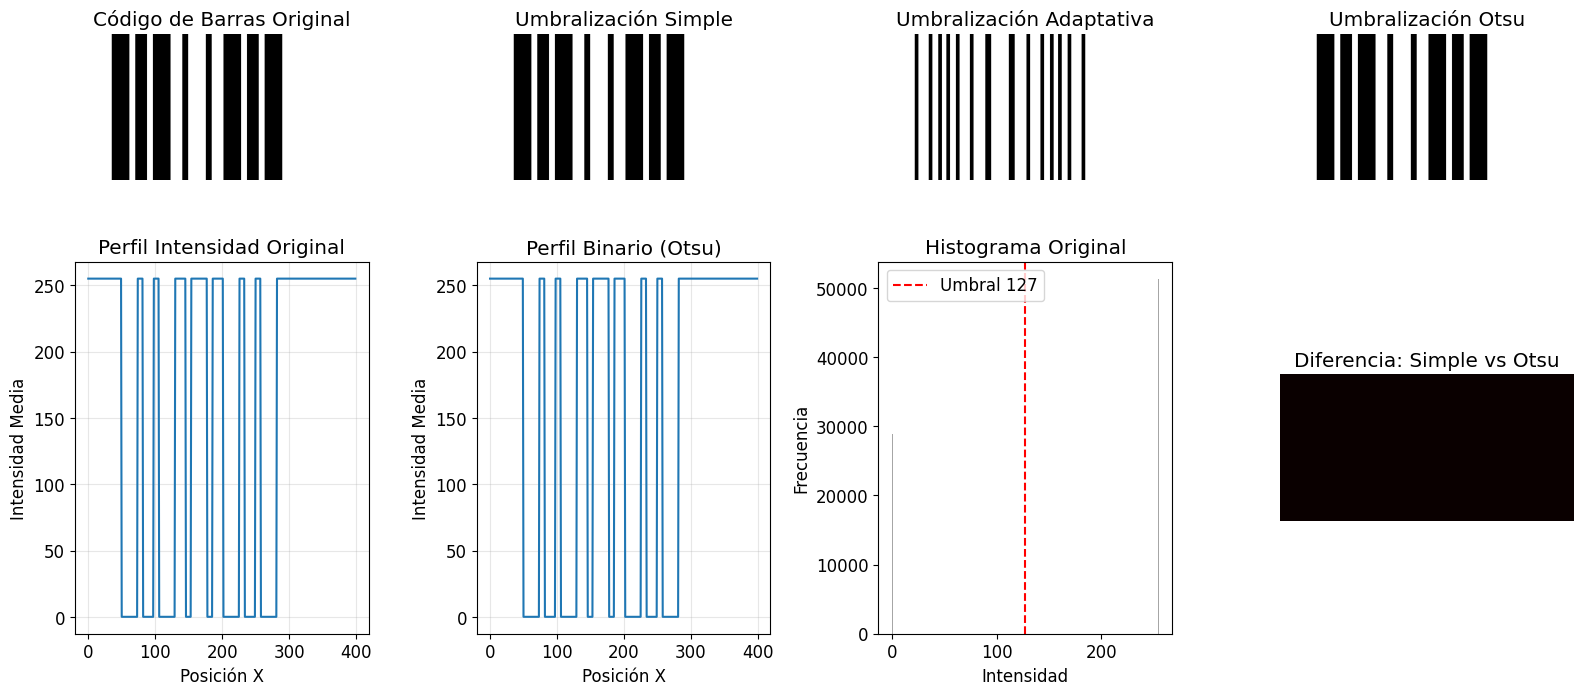

In [8]:
# Análisis de código de barras
def procesar_codigo_barras(imagen_barras):
    """Demuestra el procesamiento de códigos de barras"""
    # Binarización usando diferentes métodos
    
    # Umbralización simple
    _, binario_simple = cv2.threshold(imagen_barras, 127, 255, cv2.THRESH_BINARY)
    
    # Umbralización adaptativa
    binario_adaptativo = cv2.adaptiveThreshold(imagen_barras, 255, 
                                             cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                             cv2.THRESH_BINARY, 11, 2)
    
    # Umbralización de Otsu
    _, binario_otsu = cv2.threshold(imagen_barras, 0, 255, 
                                   cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return binario_simple, binario_adaptativo, binario_otsu

# Procesar código de barras
bin_simple, bin_adaptativo, bin_otsu = procesar_codigo_barras(img_barras)

# Análisis de perfil horizontal (típico para códigos de barras)
perfil_horizontal = np.mean(img_barras, axis=0)
perfil_binario = np.mean(bin_otsu, axis=0)

# Visualizar análisis de código de barras
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Imagen original del código de barras
axes[0,0].imshow(img_barras, cmap='gray')
axes[0,0].set_title('Código de Barras Original')
axes[0,0].axis('off')

# Diferentes binarizaciones
axes[0,1].imshow(bin_simple, cmap='gray')
axes[0,1].set_title('Umbralización Simple')
axes[0,1].axis('off')

axes[0,2].imshow(bin_adaptativo, cmap='gray')
axes[0,2].set_title('Umbralización Adaptativa')
axes[0,2].axis('off')

axes[0,3].imshow(bin_otsu, cmap='gray')
axes[0,3].set_title('Umbralización Otsu')
axes[0,3].axis('off')

# Perfiles horizontales
axes[1,0].plot(perfil_horizontal)
axes[1,0].set_title('Perfil Intensidad Original')
axes[1,0].set_xlabel('Posición X')
axes[1,0].set_ylabel('Intensidad Media')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].plot(perfil_binario)
axes[1,1].set_title('Perfil Binario (Otsu)')
axes[1,1].set_xlabel('Posición X')
axes[1,1].set_ylabel('Intensidad Media')
axes[1,1].grid(True, alpha=0.3)

# Histograma de la imagen original
axes[1,2].hist(img_barras.ravel(), bins=256, alpha=0.7, color='gray')
axes[1,2].set_title('Histograma Original')
axes[1,2].set_xlabel('Intensidad')
axes[1,2].set_ylabel('Frecuencia')
axes[1,2].axvline(127, color='red', linestyle='--', label='Umbral 127')
axes[1,2].legend()

# Diferencias entre métodos
diferencia = np.abs(bin_simple.astype(np.float32) - bin_otsu.astype(np.float32))
axes[1,3].imshow(diferencia, cmap='hot')
axes[1,3].set_title('Diferencia: Simple vs Otsu')
axes[1,3].axis('off')

plt.tight_layout()
plt.show()


In [ ]:

# Detección de bordes en escala de grises
def detectar_bordes(imagen_gris):
    """Demuestra diferentes algoritmos de detección de bordes"""
    # Suavizar imagen para reducir ruido
    suavizada = cv2.GaussianBlur(imagen_gris, (5, 5), 0)
    
    # Algoritmos de detección de bordes
    bordes_canny = cv2.Canny(suavizada, 50, 150)
    
    # Operadores Sobel
    sobel_x = cv2.Sobel(suavizada, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(suavizada, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel_combined = np.uint8(np.clip(sobel_combined, 0, 255))
    
    # Operador Laplaciano
    laplaciano = cv2.Laplacian(suavizada, cv2.CV_64F)
    laplaciano = np.uint8(np.clip(np.abs(laplaciano), 0, 255))
    
    return bordes_canny, sobel_combined, laplaciano

# Convertir imagen de colores a escala de grises para detección de bordes
gris_para_bordes = cv2.cvtColor(img_gradiente, cv2.COLOR_BGR2GRAY)
canny, sobel, laplaciano = detectar_bordes(gris_para_bordes)

# Visualizar detección de bordes
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(gris_para_bordes, cmap='gray')
axes[0].set_title('Imagen en Escala de Grises')
axes[0].axis('off')

axes[1].imshow(canny, cmap='gray')
axes[1].set_title('Bordes Canny')
axes[1].axis('off')

axes[2].imshow(sobel, cmap='gray')
axes[2].set_title('Bordes Sobel')
axes[2].axis('off')

axes[3].imshow(laplaciano, cmap='gray')
axes[3].set_title('Bordes Laplaciano')
axes[3].axis('off')

plt.tight_layout()
plt.show()


TODO: CREAR EL DE XYZ

## 7. Comparación y Análisis Final

### Resumen de Espacios de Color Analizados

| Espacio | Canales | Principales Ventajas | Aplicaciones Típicas |
|---------|---------|---------------------|---------------------|
| **RGB** | R, G, B | Intuitivo, estándar dispositivos | Visualización, captura básica |
| **HSV** | H, S, V | Robusto a iluminación, segmentación | Detección objetos, seguimiento |
| **CIELAB** | L*, a*, b* | Uniforme perceptual, ΔE preciso | Control calidad, medicina |
| **YCrCb** | Y, Cr, Cb | Separación luminancia, compresión | Detección piel, video |
| **Escala Grises** | Intensidad | Rápido, simple, estructural | OCR, códigos barras, bordes |
| **XYZ** | X, Y, Z | Estándar fundamental, calibración | Colorimetría, investigación |

### Criterios de Selección

#### Para Segmentación por Color:
1. **HSV**: Primera opción para objetos de color conocido
2. **LAB**: Cuando se requiere precisión perceptual
3. **YCrCb**: Específicamente para detección de piel

#### Para Análisis Estructural:
1. **Escala de Grises**: Detección de formas, texturas, bordes
2. **Canal Y (YCrCb)** o **L (LAB)**: Para conservar información de luminancia

#### Para Aplicaciones Industriales:
1. **LAB**: Control de calidad, matching de colores
2. **XYZ**: Calibración de dispositivos, estándares

#### Para Compresión/Transmisión:
1. **YCrCb**: Base de JPEG, video codecs
2. **Escala de Grises**: Máxima compresión